In [1]:
from src.classifier import FewShotClassifier
from src.encoders import BertEncoder
import numpy as np
import pandas as pd

In [17]:
df_train = pd.read_csv('data/train_augmented_v1.csv')
df_test = pd.read_csv('data/test_all.csv')

In [3]:
encoder = BertEncoder()

In [18]:
X_train = encoder.transform(df_train['text'])
y_train = df_train['label']

In [28]:
classifier = FewShotClassifier(X_ref=X_train, y_ref=y_train,nb_instances=10)

In [6]:
X_test = encoder.transform(df_test['text'])
y_test = df_test['label']

In [29]:
_, class_report, confusion_matrix = classifier.evaluate_classifier(X_test, y_test)

Accuracy: 0.54


In [30]:
print(class_report)

               precision    recall  f1-score   support

    Education       0.50      0.61      0.55        97
Entertainment       0.84      0.70      0.76        96
  Environment       0.49      0.80      0.60       171
      Fashion       0.29      0.06      0.10       105
      Finance       0.58      0.22      0.32        82
         Food       0.26      0.25      0.26        24
       Health       0.75      0.68      0.72       165
     Politics       0.51      0.77      0.62       119
      Science       0.59      0.21      0.31        76
       Sports       0.66      0.45      0.53        47
   Technology       0.32      0.68      0.44        75
       Travel       0.68      0.33      0.44        83

     accuracy                           0.54      1140
    macro avg       0.54      0.48      0.47      1140
 weighted avg       0.56      0.54      0.51      1140



<Axes: >

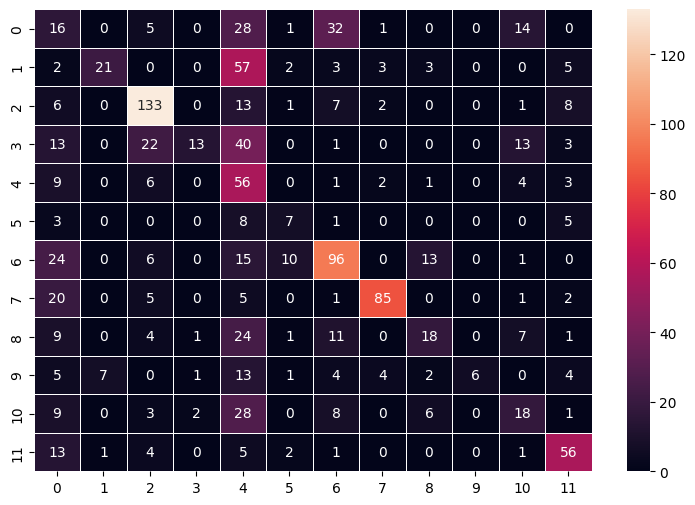

In [10]:
# Display confusion matrix with all the annotations
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
